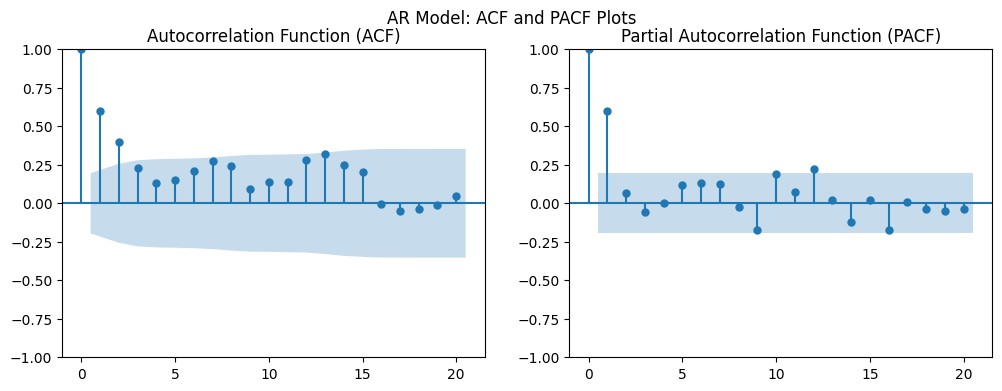

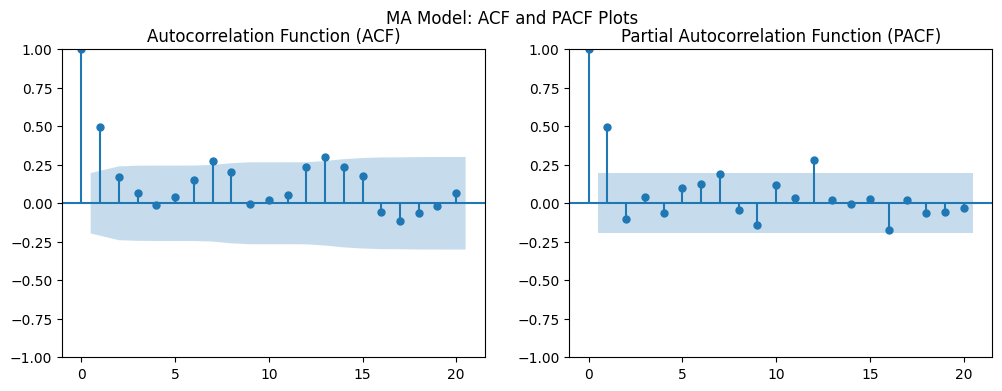

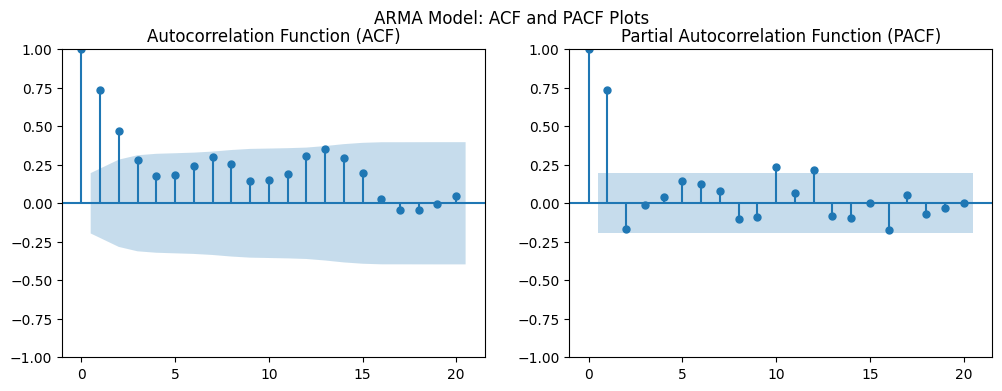

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

def generate_data(model_type, params, n):
    np.random.seed(0)
    if model_type == 'ar':
        y = sm.tsa.arma_generate_sample(ar=[1, -params[0]], ma=[1], nsample=n)
    elif model_type == 'ma':
        y = sm.tsa.arma_generate_sample(ar=[1], ma=[1, params[0]], nsample=n)
    elif model_type == 'arma':
        y = sm.tsa.arma_generate_sample(ar=[1, -params[0]], ma=[1, params[1]], nsample=n)
    return y

def plot_acf_pacf(data, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    sm.graphics.tsa.plot_acf(data, lags=20, ax=ax1)
    sm.graphics.tsa.plot_pacf(data, lags=20, ax=ax2)
    ax1.set_title('Autocorrelation Function (ACF)')
    ax2.set_title('Partial Autocorrelation Function (PACF)')
    plt.suptitle(title)
    plt.show()

def fit_model(data, model_type, lags):
    if model_type == 'ar':
        model = sm.tsa.AutoReg(data, lags=lags).fit()
    elif model_type == 'arima':
        model = sm.tsa.ARIMA(data, order=(1, 0, 1), seasonal_order=(0, 0, 0, 0)).fit()

n = 100

ar_params = np.array([0.5])
y_ar = generate_data('ar', ar_params, n)
plot_acf_pacf(y_ar, "AR Model: ACF and PACF Plots")
for lags in [1, 2]:
    fit_model(y_ar, 'ar', lags)

ma_params = np.array([0.5])
y_ma = generate_data('ma', ma_params, n)
plot_acf_pacf(y_ma, "MA Model: ACF and PACF Plots")
for lags in [0, 1]:
    fit_model(y_ma, 'ar', lags)

arma_params = np.array([0.5, 0.3])
y_arma = generate_data('arma', arma_params, n)
plot_acf_pacf(y_arma, "ARMA Model: ACF and PACF Plots")
for lags in [1, 2]:
    fit_model(y_arma, 'ar', lags)